In [2]:
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('Forces3.csv').values


In [9]:
def TVTsplit(matrix, train = .7):
    #     This function's purpose is to split a given matrix
    #     into three parts: train, test, and validate. The 
    #     train parameter is the percentage of the data that
    #     goes into training 70% by default. The val parameter
    #     determines how much goes into the validation set
    #     15% by default. The rest of the data goes into
    #     the test set.
    
#     The following is needed to perform the operations
#     in the calculations in here.
    import numpy as np
    # The following does some common sense things like
    # telling you that train and val need to add up to less
    # than 1.

    if(train > .99):
        print("Splitting failed. Please make sure that train is less than .99 so that test and val have enough data.")
        return 0
    
#     These two things calculate the subset lengths that 
#     are needed for the subsetting.
    splitnum = int(len(matrix[:,0])*train)
    splitnum2 = int((len(matrix[:,0]) - splitnum)/2)
#     np.random.shuffle(matrix)

#     The next three separate the data into the three sets
#     using the splitnums from above.
    Train = matrix[0:splitnum,]
    Test = matrix[splitnum:(splitnum+splitnum2),]
    Val = matrix[(splitnum+splitnum2):,]
    return Train, Val, Test
train, val, test = TVTsplit(data)

In [10]:
Xtrain = train[:,:-3]
Ytrain = train[:,-3:]
Xval = val[:,:-3]
Yval = val[:,-3:]
Xtest = test[:,:-3]
Ytest = test[:,-3:]

In [11]:
def oneHotEncode(matrix, columns):
    for column in columns:
        uniques = np.unique(matrix[:,column])
        newmat = np.zeros((len(matrix[:,column]),len(uniques)))

        for i in range(0,len(matrix[:,column])):
            for j in range(0,len(uniques)):
                if(matrix[i,column] == uniques[j]):
                    newmat[i,j] = 1
        matrix = np.column_stack((matrix,newmat))
    try:
        matrix = np.delete(matrix,columns,axis = 1).astype(float)
    except:
        matrix = np.delete(matrix,columns,axis = 1)
    return matrix
Xtrain = oneHotEncode(Xtrain,[3,95])
Xval = oneHotEncode(Xval,[3,95])
Xtest = oneHotEncode(Xtest,[3,95])

In [50]:
def dist(a,b):
    return np.sum((a-b)**2, axis = 1)

In [52]:
k = 5
predY = np.empty((len(Xval),3))
D = np.empty((Xval.shape[0],Xtrain.shape[0]), np.float32)
for i in range(len(Xval)):
    D[i,] = dist(Xtrain,Xval[i,])
    if i%100 == 0:
        print(i)
#     index = np.argsort(D)[0:k]
#     newD = D[index]
#     Y = Ytrain[index,]
#     predY[i,] = np.sum(stat.norm(np.mean(newD),np.std(newD)).pdf(newD).reshape(-1,1)*Y, axis = 0)/(np.sum(stat.norm(np.mean(newD),np.std(newD+1e-6)).pdf(newD))+1e-20)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [72]:
errs = []
for k in range(20,40):
    predY = np.empty((len(D),3))
    for i in range(len(D)):
        index = np.argsort(D[i,])[0:k]
        newD = D[i,index]
        Y = Ytrain[index,]
        predY[i,] = np.sum(stat.norm(np.mean(newD),np.std(newD)).pdf(newD).reshape(-1,1)*Y, axis = 0)/(np.sum(stat.norm(np.mean(newD),np.std(newD)).pdf(newD))+1e-20)
    r = np.mean((predY - Yval)**2)
    errs.append(r)
    print(k)
    print(r)

20
44433594359.74582
21
44372122116.25255
22
44320055028.65105
23
44275344413.4261
24
44197708685.33461
25
44115266241.833916
26
44105775376.2237
27
44097987507.88275
28
44091699842.58898
29
44050985267.166534
30
44026428577.92869
31
43992884863.606445
32
44021135676.73572
33
44022509746.723595
34
44031953621.817


KeyboardInterrupt: 

In [83]:
import gc
gc.collect()

6067

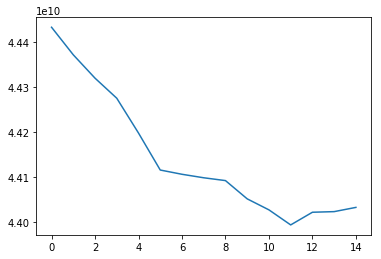

In [73]:
plt.plot(errs)

In [84]:
k = 31
D = np.empty((Xtest.shape[0],Xtrain.shape[0]), np.float32)
for i in range(len(Xtest)):
    D[i,] = dist(Xtrain,Xtest[i,])
    if i%100 == 0:
        print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [85]:
predY = np.empty((len(D),3))
for i in range(len(D)):
    index = np.argsort(D[i,])[0:k]
    newD = D[i,index]
    Y = Ytrain[index,]
    predY[i,] = np.sum(stat.norm(
        np.mean(newD),np.std(newD)).pdf(newD).reshape(-1,1)*Y,
                       axis = 0)/(np.sum(stat.norm(
        np.mean(newD),np.std(newD)).pdf(newD))+1e-20)

TypeError: only size-1 arrays can be converted to Python scalars

In [92]:
np.trace((predY - Ytest).T@(predY - Ytest))/len(Ytest)

134139746992.05203